EDA

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ----------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from flask import Flask, request, jsonify

In [ ]:
df = pd.read_csv('dataset\American_Housing_Data_20231209.csv')

In [ ]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [ ]:
df.shape

(39981, 14)

In [ ]:
# Estadísticas descriptivas del conjunto de datos
df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [ ]:
# Identificar y manejar duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# Manejar valores faltantes
df.dropna(inplace=True)

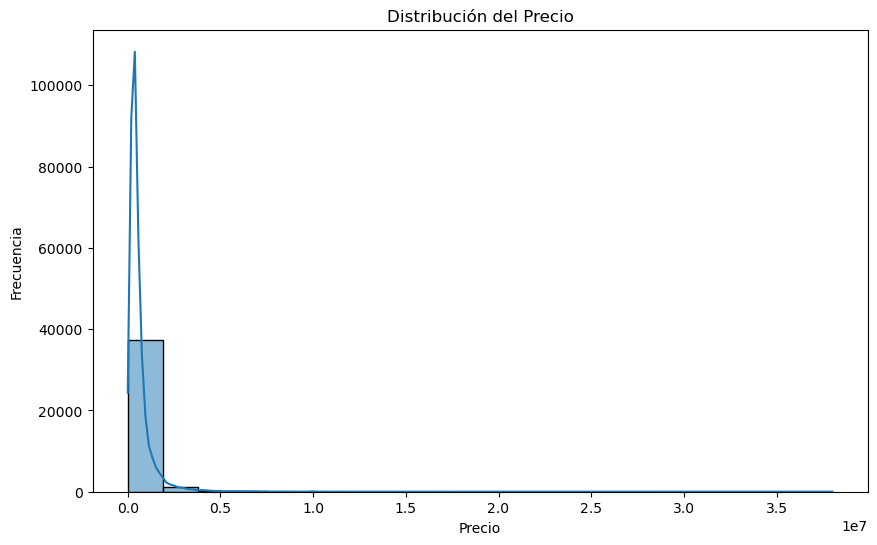

In [ ]:
# Visualización de la distribución del precio
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

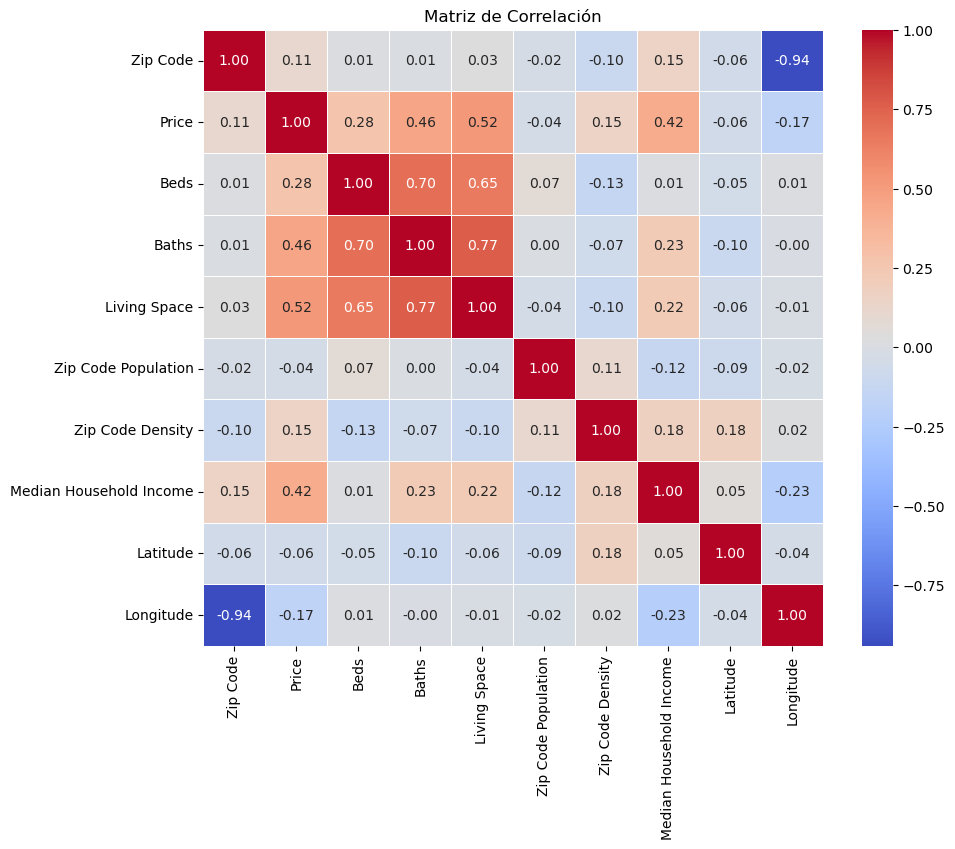

In [ ]:
# Correlación entre variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

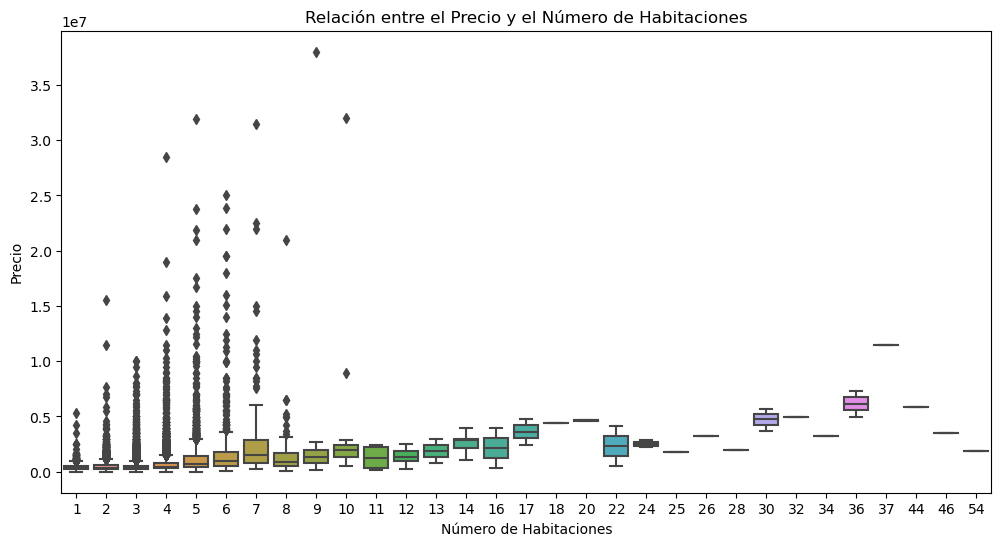

In [ ]:
# Relación entre el precio y el número de habitaciones
plt.figure(figsize=(12, 6))
sns.boxplot(x='Beds', y='Price', data=df)
plt.title('Relación entre el Precio y el Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.show()

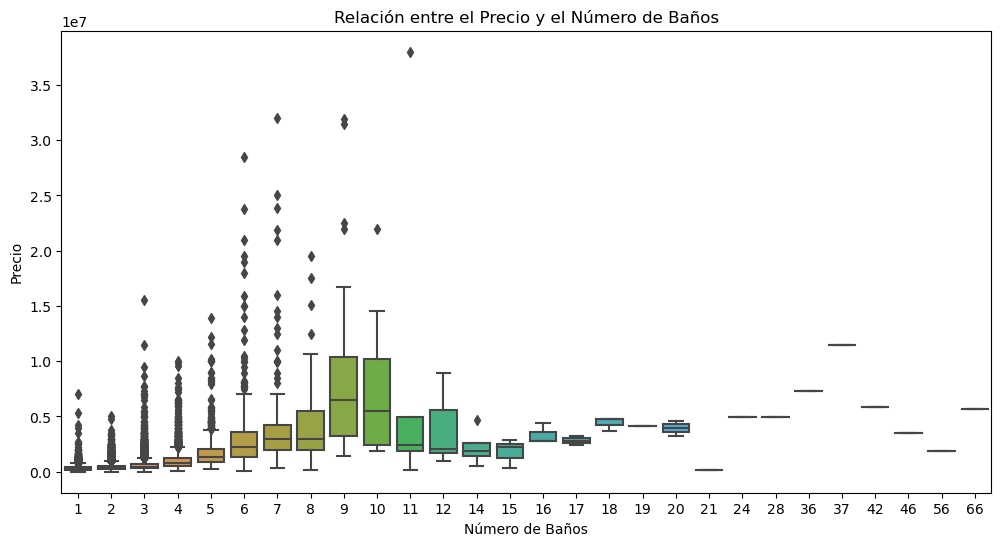

In [ ]:
# Relación entre el precio y el número de baños
plt.figure(figsize=(12, 6))
sns.boxplot(x='Baths', y='Price', data=df)
plt.title('Relación entre el Precio y el Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Precio')
plt.show()

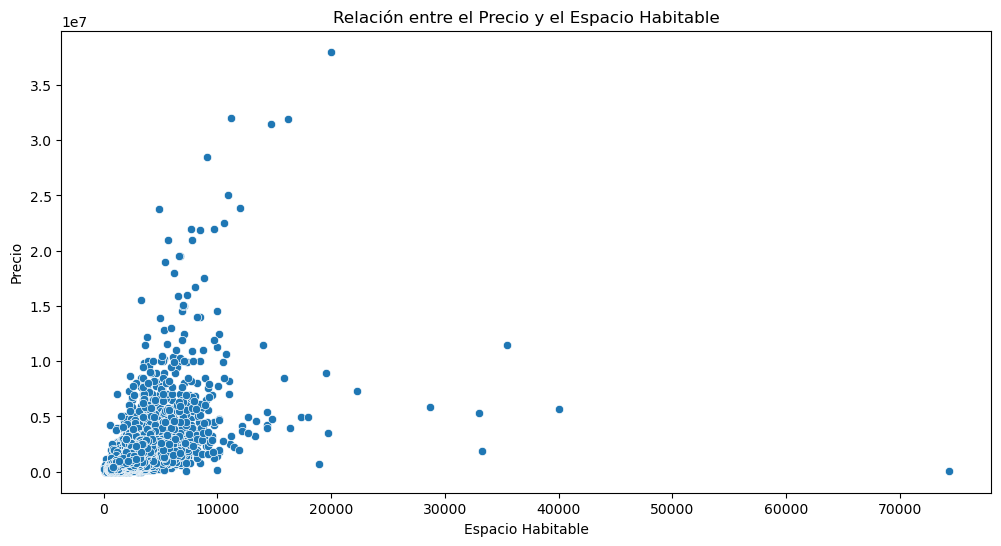

In [ ]:
# Relación entre el precio y el espacio habitable
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Living Space', y='Price', data=df)
plt.title('Relación entre el Precio y el Espacio Habitable')
plt.xlabel('Espacio Habitable')
plt.ylabel('Precio')
plt.show()

MODELO 1

In [ ]:
# Seleccionar características (X) y la variable objetivo (y)
X = df[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = df['Price']

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 564248804976.2788
R-squared: 0.4288576529044965


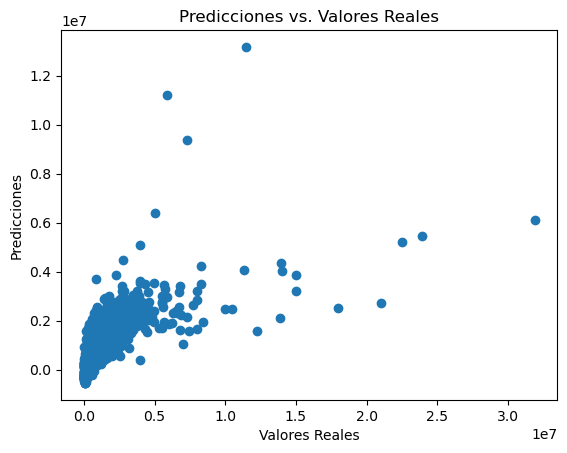

In [ ]:
# Visualizar las predicciones contra los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")
plt.show()

Modelo 2

In [ ]:
# Definir rangos de precios (clases)
# Aquí, se definen tres clases: Baja, Media y Alta
df['PriceRange'] = pd.cut(df['Price'], bins=[0, 1_000_000, 2_000_000, float('inf')], labels=['Baja', 'Media', 'Alta'])


In [ ]:
# Seleccionar características (X) y la variable objetivo (y)
X = df[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = df['PriceRange']

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar un modelo de clasificación (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')

Accuracy del modelo: 0.9342644797539723


In [ ]:
# Calcular métricas de clasificación
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        Alta       0.75      0.70      0.72       249
        Baja       0.96      0.98      0.97      6860
       Media       0.66      0.58      0.62       695

    accuracy                           0.93      7804
   macro avg       0.79      0.75      0.77      7804
weighted avg       0.93      0.93      0.93      7804



Modelo 2 cambian hiperparametro

In [ ]:
# Inicializar el modelo de clasificación (Random Forest, en este caso)
modelHP = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Entrenar el modelo
modelHP.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelHP.predict(X_test)



In [ ]:
# Calcular métricas de clasificación
reportModel2 = classification_report(y_test, y_pred)
print(reportModel2)

              precision    recall  f1-score   support

        Alta       0.75      0.70      0.72       249
        Baja       0.96      0.98      0.97      6860
       Media       0.66      0.58      0.62       695

    accuracy                           0.93      7804
   macro avg       0.79      0.75      0.77      7804
weighted avg       0.93      0.93      0.93      7804



Modelo 3

In [ ]:
# Seleccionar características (X) y la variable objetivo (y)
X = df[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = df['Price']

In [ ]:
# Discretizar las etiquetas de precio en categorías (puedes ajustar los umbrales según tu necesidad)
bins = [0, 1500000, 3000000, float('inf')]
labels = ['Bajo', 'Medio', 'Alto']
y_discrete = pd.cut(y, bins=bins, labels=labels, right=False)

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)


In [ ]:
# Inicializar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)


In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

d:\Laboratorio\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Calcular métricas de clasificación
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report_str = classification_report(y_test, y_pred)

In [ ]:
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print('Classification Report:')
print(classification_report_str)

Precision: 0.9253557616069032
Recall: 0.9419528446950282
F1-Score: 0.9318986768150591
Classification Report:
              precision    recall  f1-score   support

        Alto       0.47      0.28      0.35       116
        Bajo       0.96      0.99      0.98      7331
       Medio       0.34      0.18      0.23       357

    accuracy                           0.94      7804
   macro avg       0.59      0.48      0.52      7804
weighted avg       0.93      0.94      0.93      7804



Modelo 3 hiperparametros

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2', 'elasticnet', 'none']}

In [ ]:
# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')


In [ ]:
# Entrenar el modelo con búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

d:\Laboratorio\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Laboratorio\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

In [ ]:
# Imprimir los mejores hiperparámetros
print(f'Mejores Hiperparámetros: {best_params}')


Mejores Hiperparámetros: {'C': 0.01, 'penalty': 'l2'}


In [ ]:
# Realizar predicciones en el conjunto de prueba con el modelo ajustado
y_pred = grid_search.predict(X_test)


In [ ]:
# Calcular métricas de clasificación con el modelo ajustado
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report_str = classification_report(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print('Classification Report:')
print(classification_report_str)

Precision: 0.9251251931478204
Recall: 0.9422091235263967
F1-Score: 0.9316295051116983
Classification Report:
              precision    recall  f1-score   support

        Alto       0.52      0.28      0.37       116
        Bajo       0.96      0.99      0.97      7331
       Medio       0.34      0.17      0.23       357

    accuracy                           0.94      7804
   macro avg       0.61      0.48      0.52      7804
weighted avg       0.93      0.94      0.93      7804



Pickling the model

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('modelRegression.pkl', 'wb'))

predection of new data using pickled file

In [ ]:
model_reg = pickle.load(open('modelRegression.pkl', 'rb'))

In [ ]:
model_reg.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': 42,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'feature_names_in_': array(['Beds', 'Baths', 'Living Space', 'Zip Code Population',
        'Zip Code Density', 'Median Household Income', 'Latitude',
        'Longitude'], dtype=object),
 'n_features_in_': 8,
 'classes_': array(['Alto', 'Bajo', 'Medio'], dtype=object),
 'n_iter_': array([1000]),
 'coef_': array([[-3.42898617e-03,  3.00388637e-03,  6.19388773e-04,
         -4.37692436e-06,  7.30070167e-05,  1.07959782e-05,
         -6.81981014e-02,  2.93800994e-02],
        [ 3.02057931e-03, -6.94429271e-03, -8.49913806e-04,
          6.10369012e-06, -1.28164005e-04, -1.43083379e-05,
          1.71801447e-01, -6.77580011e-03],
        [ 4.08406853e-04,  3.94040634e-03,  2.30525034e-04,
         -1.72

In [ ]:
new_data = {
    "Beds": 2,
    "Baths": 3,
    "Living Space": 1967,
    "Zip Code Population": 29563,
    "Zip Code Density": 20967.9,
    "Median Household Income": 370046,
    "Latitude": 40.72001,
    "Longitude": -74.00472
}

In [ ]:
# Create a DataFrame from the new data
df_new = pd.DataFrame([new_data])

In [ ]:
predicted_math_score = model_reg.predict(df_new)

In [ ]:
predicted_math_score

array(['Alto'], dtype=object)

https://github.com/snlDIU/mlzoomcamp_capstone1/blob/main/notebook_capstone1.ipynb

In [ ]:
conda create -p venv python==3.8 -y


Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda activate venv


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install python

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [4]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings
